<h1 align="center">Customer Segmentation using RFM and K-Means</h1>

---

In [2740]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics.pairwise import euclidean_distances
warnings.filterwarnings('ignore')

In [2741]:
df = pd.read_csv('data.csv',encoding='unicode_escape')

In [2742]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2743]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


----
## Data Pre-Processing
----

**Removing Null Values**

In [2744]:
null_df = df.isnull().sum().to_frame().T
null_df= (null_df/df.shape[0])*100
null_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [2745]:
#remove null values
df=df.dropna()

In [2746]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Removing duplicate rows**

In [2747]:
dupliacte_rows = df[df.duplicated()]
dupliacte_rows.head()
dupliacte_rows.shape[0]

5225

In [2748]:
df= df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2749]:
mask= df['InvoiceNo'].to_numpy().astype(str)

**Dealing with cancelled transactions**

In [2750]:
mask=np.char.isdigit(mask)

In [2751]:
df['Status']=np.where(mask, 'Complete', 'Cancelled')

In [2752]:
df['Status'].value_counts()

Complete     392732
Cancelled      8872
Name: Status, dtype: int64

**Analyzing and cleaning Description attribute**

In [2753]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64

In [2754]:
unqiue_descriptions = df['Description'].unique().astype(str)
mask_1=np.char.isupper(unqiue_descriptions)

In [2755]:
pd.DataFrame(unqiue_descriptions[~mask_1])

,0
0,Discount
1,BAG 500g SWIRLY MARBLES
2,POLYESTER FILLER PAD 45x45cm
3,POLYESTER FILLER PAD 45x30cm
4,POLYESTER FILLER PAD 40x40cm
5,FRENCH BLUE METAL DOOR SIGN No
6,Manual
7,BAG 250g SWIRLY MARBLES
8,BAG 125g SWIRLY MARBLES
9,3 TRADITIONAl BISCUIT CUTTERS SET


In [2756]:
description_filter = ['Discount','Manual','Bank Charges','Next Day Carriage','High Resolution Image','CRUK Commission'] 
df = df[~df['Description'].isin(description_filter)]

In [2757]:
df['Description']= df['Description'].str.upper()

In [2758]:
df.shape

(400956, 9)

**Removing zero price values**

In [2759]:
df = df[df['UnitPrice']>0]

In [2760]:
df.shape

(400922, 9)

In [2761]:
# Reset Index
df.reset_index(inplace=True, drop=True)

**Cleaned DataFrame**

In [2762]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Complete
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Complete
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Complete
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Complete
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Complete


In [2763]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,400922.000000,400922.000000,400922.000000
mean,12.164823,3.054901,15281.333439
std,249.667872,19.742133,1713.902120
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,8142.750000,18287.000000


----
## RFM Analysis
----

### Recency    
Calculating recency of transaction for each customer

In [2764]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
rfm = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm['InvoiceDate']=pd.to_datetime(rfm['InvoiceDate'])

recency = pd.to_datetime(df['InvoiceDate'].max())
rfm['Recency'] = (recency - rfm['InvoiceDate']).dt.days
rfm.drop(columns=['InvoiceDate'], inplace=True)

In [2765]:
rfm.shape

(4362, 2)

In [2766]:
rfm.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


### Frequency    
Computing frequency of purchase for each customer

In [2767]:
freq = df.groupby('CustomerID')['InvoiceDate'].nunique()
freq = pd.DataFrame(freq).reset_index()
rfm['Frequency']= freq['InvoiceDate']

quantity = df.groupby('CustomerID')['Quantity'].sum()
quantity = pd.DataFrame(quantity).reset_index()
rfm['TotalQuantity'] = quantity['Quantity']
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity
0,12346.0,325,2,0
1,12347.0,1,7,2458
2,12348.0,74,4,2341
3,12349.0,18,1,631
4,12350.0,309,1,197


### Monetary    
Computing total spending values of each customer and the average purchase values for each transaction

In [2768]:
df['Price'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Price'].sum()
monetary = pd.DataFrame(monetary).reset_index()
rfm['Spending'] = monetary['Price']
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending
0,12346.0,325,2,0,0.00
1,12347.0,1,7,2458,4310.00
2,12348.0,74,4,2341,1797.24
3,12349.0,18,1,631,1757.55
4,12350.0,309,1,197,334.40


In [2769]:
total = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total.rename(columns={'InvoiceNo': 'No of Transactions'}, inplace=True)
Avg_value = monetary.merge(total, on='CustomerID')
Avg_value['Avg_value'] = Avg_value['Price'] / Avg_value['No of Transactions']
rfm = pd.merge(rfm, Avg_value[['CustomerID', 'Avg_value']], on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,1,7,2458,4310.00,615.714286
2,12348.0,74,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,309,1,197,334.40,334.400000


### Geography    
Analyzing country of most numbers of transactions for each customer.

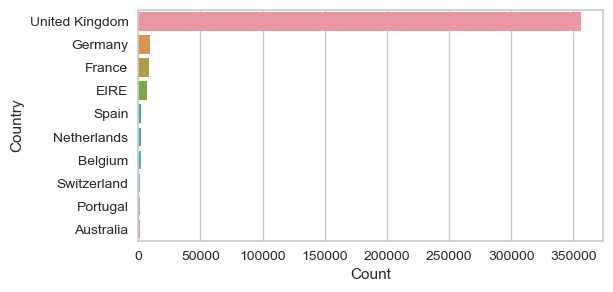

In [2770]:
plt.figure(figsize=(6, 3))
country=pd.DataFrame(df['Country'].value_counts()).reset_index()
country = country.rename(columns={'Country': 'Count', 'index': 'Country'})
sns.barplot(country.head(10),x='Count', y='Country',orient='h')
plt.show()

Assigning Customers with maximum transactions from UK as 1, 0 otherwise

In [2771]:
country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Count')
most_trans_coun= country.sort_values('Count', ascending=False).drop_duplicates('CustomerID')
most_trans_coun['UK'] = most_trans_coun['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

In [2772]:
rfm = pd.merge(rfm, most_trans_coun[['CustomerID', 'UK']], on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,1,7,2458,4310.00,615.714286,0
2,12348.0,74,4,2341,1797.24,449.310000,0
3,12349.0,18,1,631,1757.55,1757.550000,0
4,12350.0,309,1,197,334.40,334.400000,0


In [2773]:
rfm['UK'].value_counts()

1    3942
0     420
Name: UK, dtype: int64

### Cancellation Rate    
Computing cancellation rate for each customer

In [2774]:
purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchases.rename(columns={'InvoiceNo':'Transactions_Count'}, inplace=True)

cancelled_rate = df[df['Status']=='Cancelled']
cancelled_rate= cancelled_rate.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancelled_rate.rename(columns={'InvoiceNo':'Cancellation_Count'}, inplace=True)

rfm = pd.merge(rfm, cancelled_rate, on='CustomerID', how='left')
rfm['Cancellation_Count'].fillna(0, inplace=True)
rfm['Cancellation_Rate'] = rfm['Cancellation_Count'] / purchases['Transactions_Count']
rfm.drop(columns=['Cancellation_Count'], inplace=True)

### RFM Processed DataFrame     
The RFM analysis is complete here. The final dataframe is as below:

In [2775]:
rfm.shape

(4362, 8)

In [2776]:
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.5
1,12347.0,1,7,2458,4310.00,615.714286,0,0.0
2,12348.0,74,4,2341,1797.24,449.310000,0,0.0
3,12349.0,18,1,631,1757.55,1757.550000,0,0.0
4,12350.0,309,1,197,334.40,334.400000,0,0.0


---
## Outlier Detection using LOF
----

In [2777]:
from sklearn.neighbors import LocalOutlierFactor

In [2778]:
clf = LocalOutlierFactor(n_neighbors=436) # setting n_neighbors as 10% of the data
outlier = clf.fit_predict(rfm.iloc[:, 1:])

In [2779]:
outlier= pd.DataFrame(outlier)
outlier.value_counts()

 1    3936
-1     426
dtype: int64

**Labelling each row as Outlier 1 or 0**

In [2780]:
rfm['Outlier'] = [1 if O==-1 else 0 for O in outlier[0]]
rfm.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate,Outlier
0,12346.0,325,2,0,0.00,0.000000,1,0.5,0
1,12347.0,1,7,2458,4310.00,615.714286,0,0.0,0
2,12348.0,74,4,2341,1797.24,449.310000,0,0.0,0
3,12349.0,18,1,631,1757.55,1757.550000,0,0.0,1
4,12350.0,309,1,197,334.40,334.400000,0,0.0,0


In [2781]:
rfm['Outlier'].value_counts(normalize=True)

0    0.902338
1    0.097662
Name: Outlier, dtype: float64

---
## Processed Data
---

**Now we remove all the outliers from the RFM DataFrame. The Data is now cleaned**

In [2782]:
processed_data = rfm[rfm['Outlier'] == 0]
outiler_data = rfm[rfm['Outlier']==1]

In [2783]:
processed_data= processed_data.drop(columns=['Outlier']).reset_index(drop=True)
outiler_data= outiler_data.drop(columns=['Outlier']).reset_index(drop=True)

In [2784]:
processed_data.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.500
1,12347.0,1,7,2458,4310.00,615.714286,0,0.000
2,12348.0,74,4,2341,1797.24,449.310000,0,0.000
3,12350.0,309,1,197,334.40,334.400000,0,0.000
4,12352.0,35,8,470,1545.41,193.176250,0,0.125


In [2785]:
processed_data.describe()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate
count,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000
mean,15331.693852,94.538110,3.721545,562.545478,963.077310,267.851595,0.911585,0.104360
std,1709.022141,101.346142,3.608504,614.443942,1005.218465,177.885181,0.283933,0.176145
min,12346.000000,0.000000,1.000000,-12.000000,-35.400000,-35.400000,0.000000,0.000000
25%,13862.750000,18.000000,1.000000,142.000000,270.157500,147.087500,1.000000,0.000000
50%,15347.500000,51.000000,2.000000,318.500000,582.050000,224.846500,1.000000,0.000000
75%,16805.250000,150.250000,5.000000,763.500000,1310.965000,341.418750,1.000000,0.200000
max,18287.000000,373.000000,39.000000,3623.000000,5154.580000,1596.270000,1.000000,1.000000


---
## Correlation
---

After plotting correlation matrix for the attibutes in the RFM. We see some correlation among the attributes. 

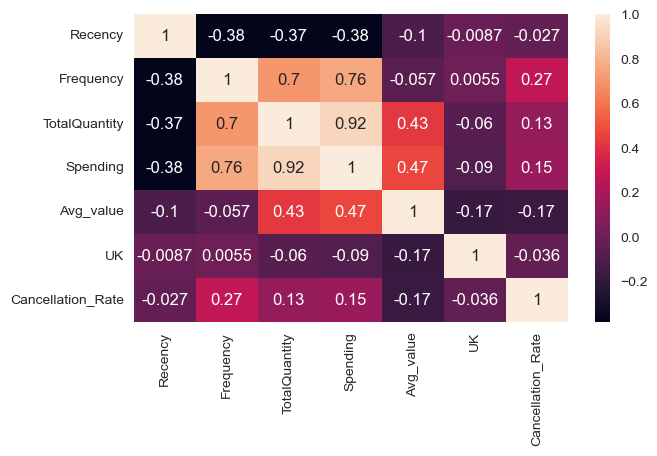

In [2786]:
plt.figure(figsize=(7, 4))
correlation = processed_data.iloc[:,1:]
sns.heatmap(correlation.corr(), annot=True)
plt.show()

---
## Standardization and PCA
---

**Standardizing the data using StandardSclaer from SK-learn**

In [2787]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
to_scale = ['Recency', 'Frequency', 'TotalQuantity','Avg_value','Spending']
scaled_data = processed_data.copy()
scaled_data[to_scale]=sc.fit_transform(scaled_data[to_scale])
scaled_data.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate
0,12346.0,2.274296,-0.477141,-0.915652,-0.958199,-1.505947,1,0.500
1,12347.0,-0.923074,0.908651,3.085221,3.329971,1.955795,0,0.000
2,12348.0,-0.202679,0.077176,2.894781,0.829938,1.020217,0,0.000
3,12350.0,2.116402,-0.754299,-0.594996,-0.625493,0.374156,0,0.000
4,12352.0,-0.587548,1.185810,-0.150636,0.579383,-0.419849,0,0.125


**As seen form the correlation matrix, some attributes are highly correlated. We will now use PCA to reduce the number of attributes**

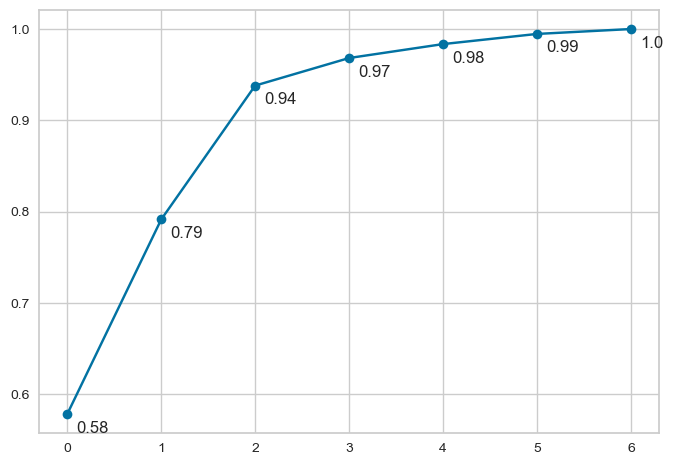

In [2788]:
from sklearn.decomposition import PCA
X=scaled_data.iloc[:,1:]
X
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, marker='o')
for i in range(len(cumsum)):
    plt.text(i+0.1, cumsum[i]-0.02, round(cumsum[i], 2))
plt.show()


From the plot above, 3 PCA components can explain 97% of the data and there is no major improvement in increasing the attributes to 4. We therefore select Number of components as 3.

In [2789]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)

In [2790]:
X_pca = pd.DataFrame(X_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
X_pca.head()

,PC1,PC2,PC3
0,-2.363522,-0.543924,1.879453
1,4.785055,1.525135,0.190559
2,2.421625,1.102480,0.284362
3,-1.595638,1.219071,1.393349
4,0.887937,-0.978710,-0.016969


**We are now ready to apply K-means clustering on the reduced dataset**

---
## K-Means Clustering
---

### Elbow Method    
The Elbow Method is a simple technique for determining the optimal number of clusters in K-means. It involves running the algorithm for a range of cluster numbers and plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point on the plot, where the reduction in WCSS slows down, indicates an optimal balance between model complexity and performance.

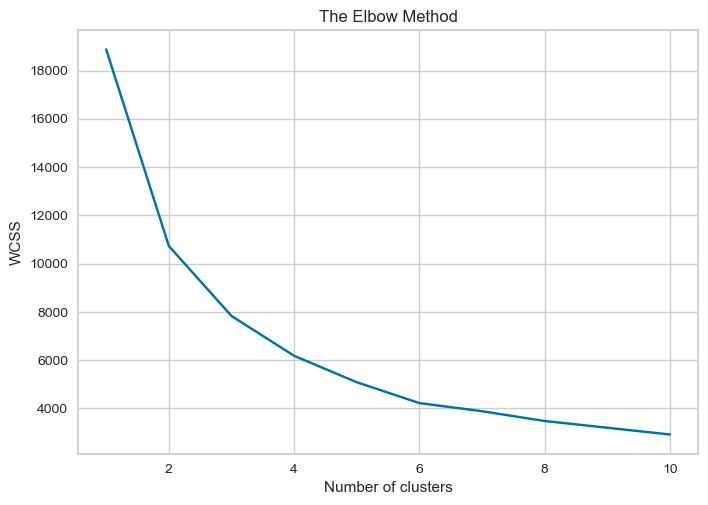

In [2791]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#scaled_data.drop(columns=['Average_Days_Between_Purchases'], inplace=True, axis=1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init='auto', random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette  Score    
The Silhouette Score quantifies the separation and cohesion of clusters. By assessing the average distances within and between clusters, the Silhouette Score helps identify the number of clusters that maximizes clustering quality. A higher Silhouette Score signifies well-defined clusters.

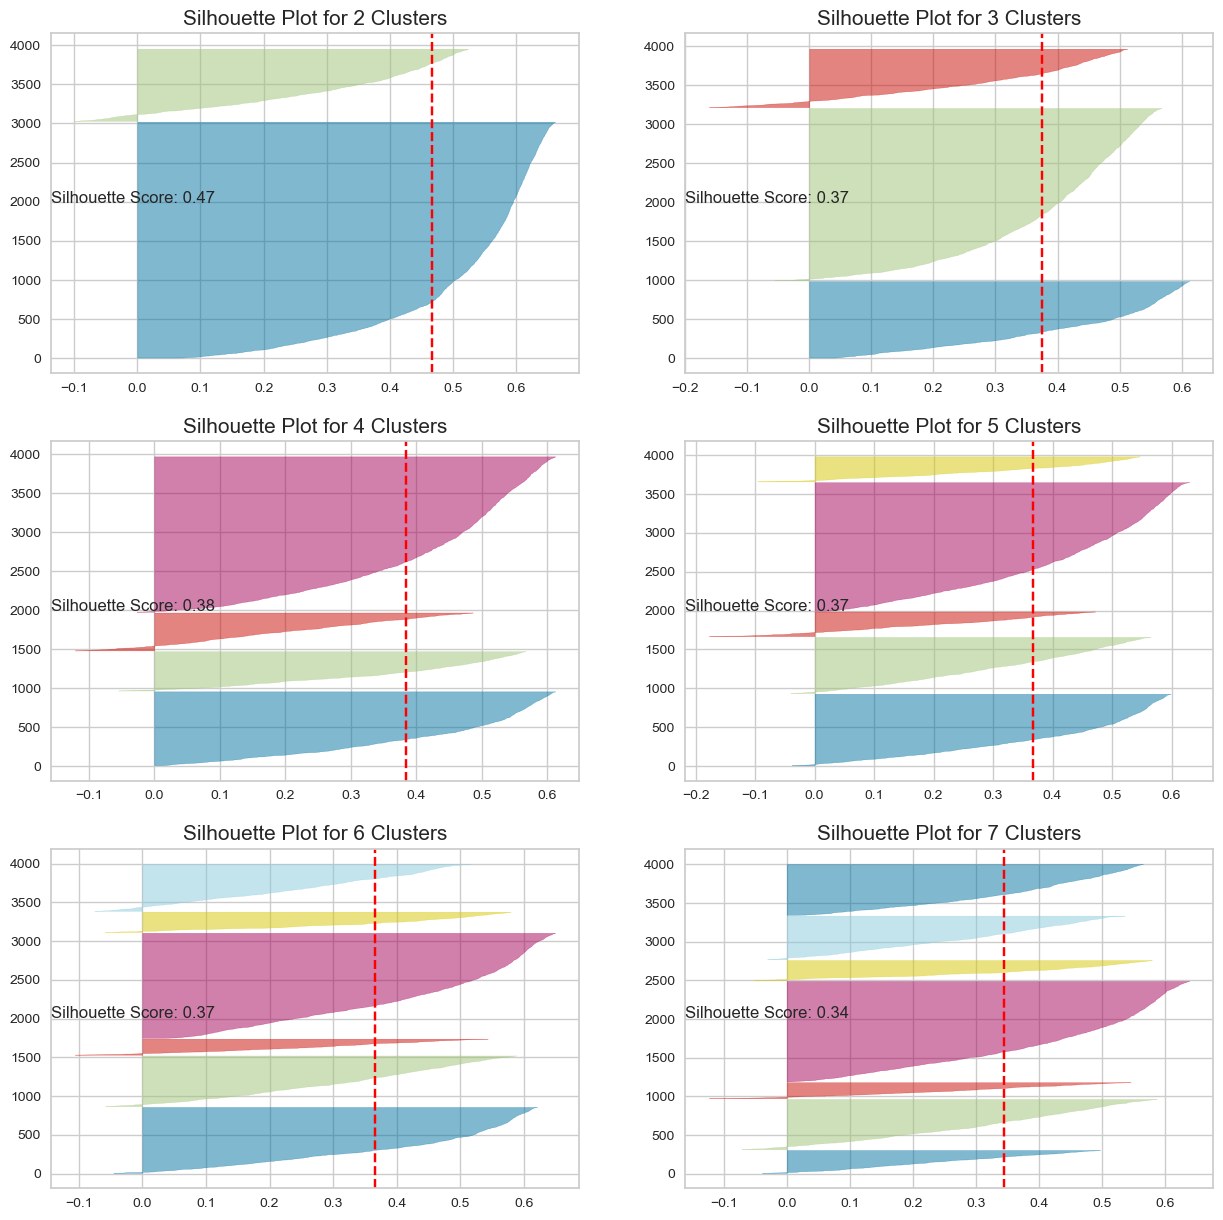

In [2792]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)
    ax[q-1][mod].set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)
    cluster_labels=km.predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    ax[q-1][mod].text(0, 0.5, f'Silhouette Score: {silhouette_avg:.2f}', transform=ax[q-1][mod].transAxes)

### Cluster Stability    
Cluster Stability involves evaluating the robustness of clusters by using random data subsamples. By calculating the average movement of cluster centroids in each iteration, this method assesses the consistency of cluster assignments. Cluster Stability ensures that identified clusters are not artifacts of random initialization, providing a more reliable representation of the underlying data structure.

In [2793]:
def normalize(list1):
    min_value = np.min(list1)
    max_value = np.max(list1)
    normalized_list = [(x - min_value) / (max_value - min_value) for x in list1]
    return normalized_list

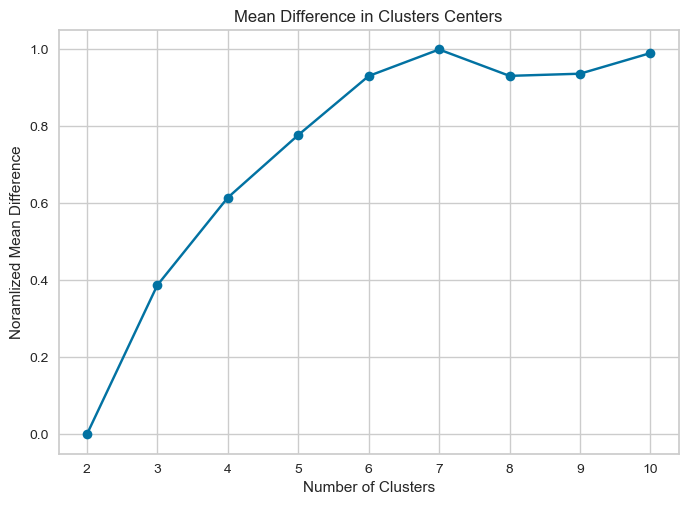

In [2794]:
def cluster_movement_range(X, n_iterations, cluster_range):
    movement_per_iteration = {k: [] for k in cluster_range}
    for k in cluster_range:
        for i in range(n_iterations):
            sample = X.sample(frac=0.7,random_state=i)

            model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
            model.fit(sample)
            centers = model.cluster_centers_
            if i > 0:
                movement = np.mean(np.linalg.norm(centers - prev_centers, axis=1))
                movement_per_iteration[k].append(movement)

            prev_centers = centers

    mean_movement_per_cluster = {k: np.mean(movements) for k, movements in movement_per_iteration.items()}

    return mean_movement_per_cluster


n_iterations = 20
cluster_range = range(2, 11)
mean_movement_per_cluster = cluster_movement_range(X_pca, n_iterations, cluster_range)

plt.plot(list(mean_movement_per_cluster.keys()), normalize(list(mean_movement_per_cluster.values())), marker='o')
plt.title('Mean Difference in Clusters Centers')
plt.xlabel('Number of Clusters')
plt.ylabel('Noramlized Mean Difference')
plt.xticks(list(mean_movement_per_cluster.keys())) 
plt.grid(True)
plt.show()


### Training with Optimal No. of Clusters (K=3)

Based on the cluster evaluation, the optimal number of clusters is 3, having a decent Silhouette score of 0.3 and good cluster stability compared to 4 clusters and above. 

In [2795]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init='auto', random_state = 42)
kmeans.fit(X_pca)
clusters=kmeans.labels_
labelled_data = processed_data.copy()
labelled_data['Cluster']=clusters

In [2796]:
labelled_data['Cluster'].value_counts()

1    2208
0     979
2     749
Name: Cluster, dtype: int64

**The labelled DataFrame with cluster IDs is below**

In [2797]:
labelled_data.head()

,CustomerID,Recency,Frequency,TotalQuantity,Spending,Avg_value,UK,Cancellation_Rate,Cluster
0,12346.0,325,2,0,0.00,0.000000,1,0.500,0
1,12347.0,1,7,2458,4310.00,615.714286,0,0.000,2
2,12348.0,74,4,2341,1797.24,449.310000,0,0.000,2
3,12350.0,309,1,197,334.40,334.400000,0,0.000,0
4,12352.0,35,8,470,1545.41,193.176250,0,0.125,1


---
## Customer Segmentation
---

**We fisrt plot PCA components of the Labelled DataFrame to see a visual representaion of the clusters**

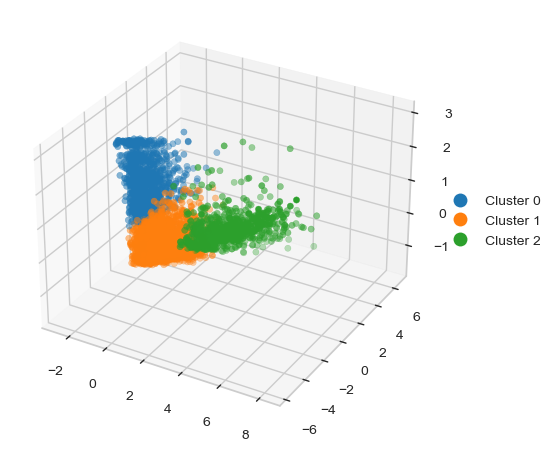

In [2798]:
colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], c=labelled_data['Cluster'].map(colors))
legend_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', \
                markerfacecolor=colors[label], markersize=10, label=legend_labels[label]) for label in colors]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**In order to analyze the cluster, we can plot bar chart of the average values of attributes of the RFM DataFrame to better understand the customer segmentation**

In [2799]:
colors = ['#1f77b4','#ff7f0e','#2ca02c']
cluster0=labelled_data[labelled_data['Cluster']==0].drop(columns=['Cluster'])
cluster1=labelled_data[labelled_data['Cluster']==1].drop(columns=['Cluster'])
cluster2=labelled_data[labelled_data['Cluster']==2].drop(columns=['Cluster'])

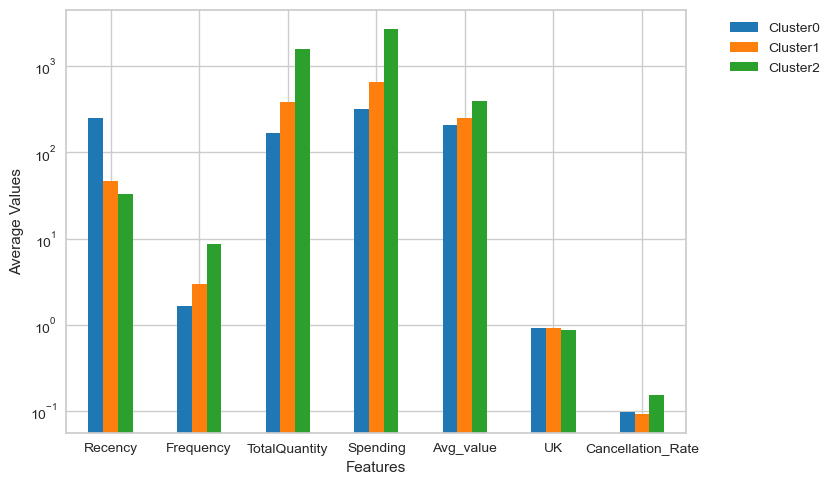

In [2800]:
zero= pd.DataFrame(cluster0.iloc[:,1:].mean()).reset_index().rename(columns={0:'Cluster0'})
one= pd.DataFrame(cluster1.iloc[:,1:].mean()).reset_index().rename(columns={0:'Cluster1'})
two= pd.DataFrame(cluster2.iloc[:,1:].mean()).reset_index().rename(columns={0:'Cluster2'})
plot_df = pd.merge(zero, one, on='index')
plot_df = pd.merge(plot_df, two, on='index')
ax = plot_df.plot(kind='bar', x='index', logy=True, rot=0, color=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Features')
ax.set_ylabel('Average Values')
plt.show()

Following chart represents the percenatge of customers assigned to each cluster

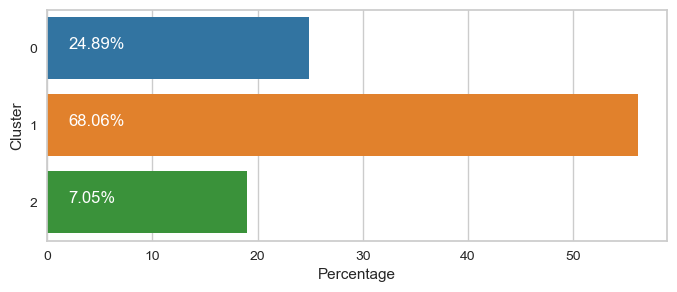

In [2801]:
cluster_pct = (labelled_data['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_pct.columns = ['Cluster', 'Percentage']
cluster_pct.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(8, 3))
sns.barplot(x='Percentage', y='Cluster', data=cluster_pct, orient='h', palette=colors)
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(2, index, f'{value:.2f}%', color='white')
plt.show()

## Conclusion     
       
In conclusion, the customer segmentation analysis using RFM (Recency, Frequency, Monetary) and K-means clustering has provided valuable insights into distinct customer behaviors. The identified clusters reveal diverse spending patterns and transaction characteristics, allowing for targeted strategies to enhance customer engagement and satisfaction.
     
1. **Cluster 0 (Blue):**
Customers in this cluster demonstrate conservative spending habits, with lower transaction frequency and product volume. While their average transaction value is modest, the low cancellation frequency and rate suggest a stable and loyal customer base.

2. **Cluster 1 (Orange):**
Customers in Cluster 1 display a moderate spending level, characterized by infrequent but substantial transactions. The increasing spending trend indicates potential for future growth. Despite a moderate cancellation frequency, the higher average transaction value suggests a willingness to make significant purchases.

3. **Cluster 2 (Green):**
Cluster 2 represents high-value customers with a substantial total spend and frequent transactions. However, their high cancellation frequency raises concerns about potential dissatisfaction. Although their spending trend is low, indicating a possible decrease over time, strategies can be devised to retain these valuable customers and address their cancellation tendencies.

This segmentation analysis provides a foundation for personalized marketing, customer retention, and loyalty programs tailored to the specific needs and behaviors of each cluster. Continued monitoring and adjustment of strategies based on evolving customer trends will be key to maximizing the effectiveness of these initiatives.